<a href="https://colab.research.google.com/github/starscream1114-source/ADALL_github/blob/main/Copy_of_ADALL_Practical_Test_Revision_Regression_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Practical Test Revision (Regression): Predicting Number of Failed Subjects

This notebook revises a **regression workflow** using a target that is a **special case**:

- Your target is a **count**: number of subjects failed (based on scores below **10** from **G1, G2, G3**).
- Because the target is an **integer count** (often 0, 1, 2, 3), it can *feel* similar to classification.
- However, you are still doing **regression** because the model outputs a **numeric value** and you evaluate using **regression metrics**.

## How to think about this target (important for revision)

| Perspective | What it means here | Typical choice |
|---|---|---|
| Regression view | Predict a numeric count (can be 0–3, but model can output non-integers) | MSE / MAE / RMSE, R² |
| Classification-like view (edge case) | If you convert counts into categories (e.g., 0 vs ≥1) you can classify | Accuracy, F1, ROC-AUC |

### Caveat you must remember
Even when the target behaves like classes, **do not switch to classification** unless the task explicitly asks you to do so.

## Practical test habits
- Keep code **readable** and **step-by-step**.
- Add short notes explaining **why** a step is needed.
- When unsure: print shapes, check missing values, and check your target distribution.

---


# ADALL Practical Test Revision Lab (Regression)

**Dataset:** Student Performance Data (KaggleHub)  
**Goal:** Build a simple, sensible regression model and explain your choices.

---

## What you will practise today
By the end of this session, you should be able to:

- Load a dataset from KaggleHub and do basic checks (Section 1)
- Define a clear **classification target** from raw columns (Section 1)
- Split data properly without leakage (Section 2)
- Build a **baseline classification pipeline** (Section 2)
- Evaluate using **confusion matrix + precision/recall/F1** (Section 3)
- Explain what you would improve next (Section 3)

---

## Standard definitions and key caveats (read first)

### Classification (standard definition)
Classification is a modelling task where you predict a **category** (label), such as pass vs fail or low risk vs high risk, based on input features.

**Conventional example:** predicting whether a student will **pass** based on study habits and background.

### Caveats and edge cases
- **Binary vs multiclass:** 2 classes (pass/fail) vs 3+ classes (low/medium/high).
- **Threshold choice matters:** turning a score into pass/fail depends on a rule (for example, pass if final grade ≥ 10).
- **Imbalanced data:** if most students pass, accuracy can look good even if the model is weak.
- **Leakage risk:** if you predict final outcome, using grades that are too close to the final grade may or may not be allowed, depending on the scenario.


## Step 0) Setup

In [ ]:
# Core libraries
import pandas as pd
import numpy as np
# Visualisation
import matplotlib.pyplot as plt
# Modelling and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


##Step 1) Load data and do quick checks

**Goal:** confirm you loaded the correct file, and the dataset looks sensible.

Checklist:
- Use `df.head()` to sanity check columns.
- Use `df.shape` to confirm rows and columns.
- Use `df.info()` to see dtypes and missing values quickly.

If anything looks odd (unexpected columns, too few rows), stop and fix it before modelling.


In [ ]:
# ------------------------------------------------------------
# LOAD DATA (do first)
# Tip: if this block is slow, run it early.
# ------------------------------------------------------------

import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("devansodariya/student-performance-data")
print("Downloaded to:", path)
print(os.listdir(path))

df = pd.read_csv(os.path.join(path, "student_data.csv"))
df.head()

Using Colab cache for faster access to the 'student-performance-data' dataset.
Downloaded to: /kaggle/input/student-performance-data
['student_data.csv']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Medu'].plot(kind='hist', bins=20, title='Medu')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Fedu'].plot(kind='hist', bins=20, title='Fedu')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('famsize').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Pstatus').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Mjob').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Fjob').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='age', y='Medu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Medu', y='Fedu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Fedu', y='traveltime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('famsize')):
  _plot_series(series, series_name, i)
  fig.legend(title='famsize', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Pstatus')):
  _plot_series(series, series_name, i)
  fig.legend(title='Pstatus', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Mjob')):
  _plot_series(series, series_name, i)
  fig.legend(title='Mjob', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Fjob')):
  _plot_series(series, series_name, i)
  fig.legend(title='Fjob', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Medu'].plot(kind='line', figsize=(8, 4), title='Medu')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Fedu'].plot(kind='line', figsize=(8, 4), title='Fedu')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Pstatus'].value_counts()
    for x_label, grp in _df_20.groupby('famsize')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('famsize')
_ = plt.ylabel('Pstatus')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Mjob'].value_counts()
    for x_label, grp in _df_21.groupby('Pstatus')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Pstatus')
_ = plt.ylabel('Mjob')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Fjob'].value_counts()
    for x_label, grp in _df_22.groupby('Mjob')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Mjob')
_ = plt.ylabel('Fjob')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['reason'].value_counts()
    for x_label, grp in _df_23.groupby('Fjob')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Fjob')
_ = plt.ylabel('reason')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['famsize'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='famsize', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Pstatus'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='Pstatus', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Mjob'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='Mjob', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Fjob'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='index', y='Fjob', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.shape

(395, 33)

In [ ]:
df.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]>

My Info: Step 1) Load data and quick checks – What you should write

After loading the dataset, I checked the first few rows to confirm the columns were loaded correctly.
The dataset size looks reasonable and matches expectations.
Using df.info() helps confirm data types and shows there are no major missing values that could affect modelling.

###Info about the dataset:

Student Performance Data was obtained in a survey of students' math course in secondary school.
It consists of 33 Column
Dataset Contains Features like:
```
school ID
gender
age
size of family
Father education
Mother education
Occupation of Father and Mother
Family Relation
Health
Grades
```

### What you should write in markdown as you go

In a practical test, you are often graded on your reasoning, not just your code.

As you proceed, add short notes like:
- What does each key column represent in plain words?
- What is your target, and why is it defined this way?
- Is the dataset imbalanced? If yes, what is the impact on evaluation?
- What metric did you choose, and why?

Keep each explanation to **2 to 5 lines**.



##Step 2) Dataset profile (no charts yet)

**Why this matters:** In a practical test, you should be able to describe your dataset without relying on charts.

Focus on:
- which columns are numeric vs categorical,
- missing values (how many, where),
- target column (what type it is, what values it takes).

Write your observations as short bullet points in your report.


My Info : Dataset Observations

Numeric columns

Age, parental education (Medu, Fedu), studytime, failures, absences

Behaviour and lifestyle scores (famrel, freetime, goout, Dalc, Walc, health)

Exam scores: G1, G2, G3

Categorical columns

Student background and demographics such as school, sex, address, family size, and parent status

Parental occupation (Mjob, Fjob), reason for school choice, and guardian

Binary indicators such as school support, family support, paid classes, activities, internet access, and romantic relationship

Missing values

No missing values were observed in the dataset

All columns are fully populated, so no imputation is required before modelling

Target column

The target is number of subjects failed

It is a numeric (count) variable, taking values from 0 to 3

The value is derived by counting how many of G1, G2, and G3 are below the passing mark of 10

###Mock question (revision of steps you have already practised)

1. Create a text-based payload that clearly describes the dataset.
The description should summarise the dataset structure, key columns, size, and any notable data issues.

2. Then, send this payload to the OpenAI API together with:

>>clear context about the task, and
>>
>>a concise instruction telling the model what you want it to do with the dataset information.

The following block shows an example in image form for revision purposes.

In [ ]:
# My Info : Send the payload to OpenAI using the Responses API

from openai import OpenAI

client = OpenAI()  # expects OPEN_AI_API_KEY in your environment (or pass api_key="...")

# Example: set your target column name (change this!)
TARGET_COL = "target"  # e.g., "churn" or "num_subjects_failed"

dataset_payload = build_dataset_payload(df, target_col=TARGET_COL)

task_context = """You are supporting feature engineering + encoding design for a supervised ML model.
Goal: improve predictive quality while avoiding hallucination.
You MUST only use the provided dataset payload. If something is missing, say 'Not provided in payload'.
"""

instruction = """Using ONLY the dataset payload:
1) Identify 5–8 high-impact feature engineering ideas grounded in the column list (no invented fields).
2) Recommend encoding approaches for categorical columns (and say why each suits tree-based models).
3) List any data issues/risks you see from the payload and what to check next.
Return as concise bullet points."""

response = client.responses.create(
    model="gpt-5.2",
    input=[
        {"role": "user", "content": task_context},
        {"role": "user", "content": dataset_payload},
        {"role": "user", "content": instruction},
    ],
)

print(response.output_text)


OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

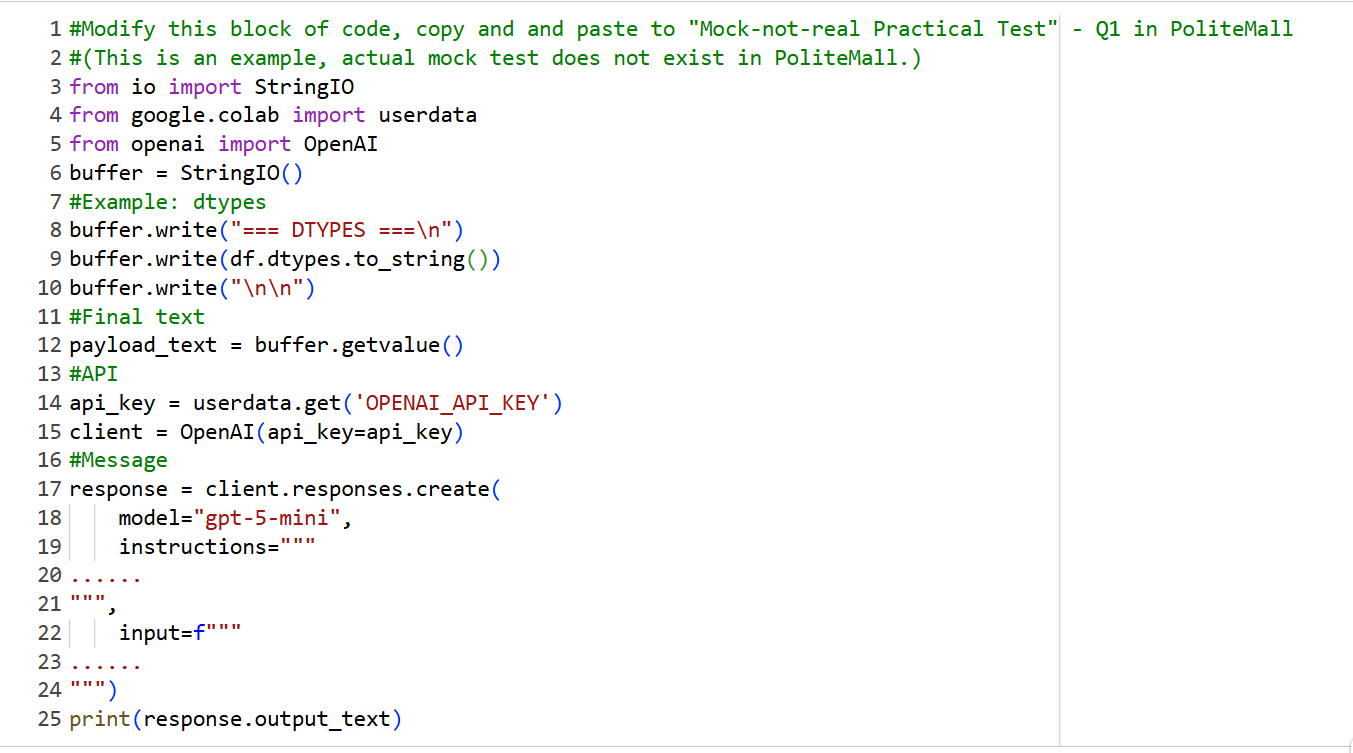

In [ ]:
#Example of solution, copy and pasted from previous practical.

In [ ]:
# My solution: Build a text payload that describes your dataset (structure, key columns, size, issues)

import pandas as pd

def build_dataset_payload(df: pd.DataFrame, target_col: str | None = None) -> str:
    n_rows, n_cols = df.shape

    # basic typing
    numeric_cols = df.select_dtypes(include="number").columns.tolist()
    categorical_cols = [c for c in df.columns if c not in numeric_cols]

    # missing values
    missing_by_col = df.isna().sum()
    missing_total = int(missing_by_col.sum())
    missing_nonzero = missing_by_col[missing_by_col > 0].sort_values(ascending=False)

    # target summary (optional)
    target_summary = "Target column: (not specified)\n"
    if target_col and target_col in df.columns:
        uniq = df[target_col].dropna().unique()
        uniq_preview = ", ".join(map(str, list(uniq[:20])))
        target_dtype = str(df[target_col].dtype)
        target_min = df[target_col].min() if pd.api.types.is_numeric_dtype(df[target_col]) else "N/A"
        target_max = df[target_col].max() if pd.api.types.is_numeric_dtype(df[target_col]) else "N/A"
        target_summary = (
            f"Target column: {target_col}\n"
            f"- Type: {target_dtype}\n"
            f"- Values (preview up to 20 unique): {uniq_preview}{' ...' if len(uniq) > 20 else ''}\n"
            f"- Range (if numeric): {target_min} to {target_max}\n"
        )

    # notable data issues (light-touch, safe)
    notes = []
    if missing_total == 0:
        notes.append("- Missing values: none detected")
    else:
        notes.append(f"- Missing values: {missing_total} total across columns")
        notes.append("- Columns with missing values (top): " + ", ".join([f"{k}={int(v)}" for k, v in missing_nonzero.head(10).items()]))

    dupes = int(df.duplicated().sum())
    notes.append(f"- Duplicate rows: {dupes}")

    payload = f"""DATASET PROFILE (text payload)

Size:
- Rows: {n_rows}
- Columns: {n_cols}

Columns:
- Numeric ({len(numeric_cols)}): {", ".join(numeric_cols[:30])}{(" ..." if len(numeric_cols) > 30 else "")}
- Categorical/Other ({len(categorical_cols)}): {", ".join(categorical_cols[:30])}{(" ..." if len(categorical_cols) > 30 else "")}

Missingness:
- Total missing cells: {missing_total}

{target_summary}

Notable data issues / quick checks:
{chr(10).join(notes)}
"""
    return payload


In [ ]:
import pandas as pd
import numpy as np
from io import StringIO

# ---------------------------
# Generate a full dataset profile
# ---------------------------

buffer = StringIO()

# dtypes
buffer.write("=== DTYPES ===\n")
buffer.write(df.dtypes.to_string())
buffer.write("\n\n")

# numeric describe
buffer.write("=== NUMERIC DESCRIBE ===\n")
buffer.write(df.describe().to_string())
buffer.write("\n\n")

# categorical describe
buffer.write("=== CATEGORICAL DESCRIBE ===\n")
try:
    buffer.write(df.describe(include='object').to_string())
except:
    buffer.write("No categorical columns")
buffer.write("\n\n")

# null summary
buffer.write("=== NULL SUMMARY ===\n")
null_summary = (
    df.isna().sum().to_frame("null_count")
    .assign(null_pct=lambda x: x["null_count"]/len(df))
)
buffer.write(null_summary.to_string())
buffer.write("\n\n")

# unique cardinality
buffer.write("=== UNIQUE VALUES PER COLUMN ===\n")
buffer.write(df.nunique().to_frame("unique_count").to_string())
buffer.write("\n\n")

# correlation matrix
buffer.write("=== CORRELATIONS (NUMERIC ONLY) ===\n")
buffer.write(df.corr(numeric_only=True).round(3).to_string())
buffer.write("\n\n")

# value counts for categoricals
buffer.write("=== VALUE COUNTS (TOP 20 PER CATEGORICAL COLUMN) ===\n")
cat_cols = df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    for col in cat_cols:
        buffer.write(f"\nColumn: {col}\n")
        vc = df[col].value_counts().head(20)
        buffer.write(vc.to_string())
        buffer.write("\n")
else:
    buffer.write("No categorical columns\n")
buffer.write("\n")

# --------- FIXED OUTLIER COMPUTATION (NO BOOLEANS) ---------
buffer.write("=== OUTLIER SUMMARY (IQR METHOD) ===\n")
num_cols = df.select_dtypes(include=['number']).columns  # exclude booleans
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5*IQR)) | (df[num_cols] > (Q3 + 1.5*IQR))).sum()
buffer.write(outliers.to_string())
buffer.write("\n\n")

# leakage scan: columns with all unique values
buffer.write("=== POSSIBLE LEAKAGE COLUMNS (UNIQUE FOR EACH ROW) ===\n")
leak_cols = df.columns[df.nunique() == len(df)]
buffer.write(str(list(leak_cols)))
buffer.write("\n\n")

# shape, duplicates, constant cols
buffer.write("=== SHAPE / DUPLICATES / CONSTANT COLUMNS ===\n")
dup_count = df.duplicated().sum()
constant_cols = df.columns[df.nunique() == 1].tolist()
buffer.write(f"Rows: {len(df)}, Columns: {df.shape[1]}\n")
buffer.write(f"Duplicate rows: {dup_count}\n")
buffer.write(f"Constant columns: {constant_cols}\n\n")

# Final text
payload_text = buffer.getvalue()

print(payload_text)


=== DTYPES ===
school                 object
sex                    object
age                     int64
address                object
famsize                object
Pstatus                object
Medu                    int64
Fedu                    int64
Mjob                   object
Fjob                   object
reason                 object
guardian               object
traveltime              int64
studytime               int64
failures                int64
schoolsup              object
famsup                 object
paid                   object
activities             object
nursery                object
higher                 object
internet               object
romantic               object
famrel                  int64
freetime                int64
goout                   int64
Dalc                    int64
Walc                    int64
health                  int64
absences                int64
G1                      int64
G2                      int64
G3                      i

In [ ]:
from google.colab import userdata
from openai import OpenAI

# Load key from Google Colab Secrets
api_key = userdata.get('OPEN_AI_API_KEY')

client = OpenAI(
    api_key=api_key,
)

In [ ]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are an expert data scientist with extensive knowledge of tree-based models.
Always justify recommendations using reasoning trace based ONLY on the dataset profile.
""",
    input=f"""
Dataset info: {payload_text}\n
Questions:\n
1. Based on the dataset profile, what data quality issues should be resolved before modelling?
Provide a priority list and justify each item. \n
2. Which columns appear redundant, correlated, or likely to cause leakage?
Explain why each is problematic. \n
Next: Provide a python script to handle the identified issues.
Define one helper function for each issue.
Then define a wrapper function that calls these helper with true false option as user choice
Provide a single line of code to run the overall wrapper function.
Do not encode categorical columns or model first.
""")

print(response.output_text)


Below I (A) list the prioritized data-quality issues to resolve before modeling with clear justifications tied only to the dataset profile you provided, (B) list columns that appear redundant / correlated / likely to cause leakage with explanations, and (C) provide a Python cleaning script that implements one helper function per issue and a wrapper that calls them under user control. Per your instruction I do not encode categorical columns or model after cleaning.

A — Priority list of data-quality issues (highest priority first) with justifications (trace tied to the dataset profile)

1) Handle leakage from earlier grades (HIGH priority)
- Why: G1 and G2 have very high correlations with G3 (G1 vs G3 = 0.801, G2 vs G3 = 0.905). If the modeling goal is to predict final grade G3 earlier (e.g., at start of term) using features available before G1/G2 were measured, including G1/G2 will produce leakage and overly optimistic performance. Even if prediction is done late in the term, these wil

In [ ]:
import pandas as pd
import numpy as np

# Helper 1: Drop leakage columns (G1/G2)
def drop_leakage_columns(df, drop_G1=True, drop_G2=True):
    """
    Drop G1 and/or G2 to avoid leakage if desired.
    Returns a copy with columns dropped.
    """
    df = df.copy()
    to_drop = []
    if drop_G1 and 'G1' in df.columns:
        to_drop.append('G1')
    if drop_G2 and 'G2' in df.columns:
        to_drop.append('G2')
    if to_drop:
        df.drop(columns=to_drop, inplace=True)
        print(f"dropped columns: {to_drop}")
    else:
        print("no leakage columns dropped")
    return df

# Helper 2: Cap absences using IQR or explicit cap_value
def cap_absences(df, method='iqr', cap_value=None, col='absences'):
    """
    Cap (winsorize) extreme absences.
    method: 'iqr' uses Q3 + 1.5*IQR; 'quantile' uses quantile (e.g., cap_value=0.99)
    If cap_value provided and method != 'iqr', it will be used as numeric cap.
    """
    df = df.copy()
    if col not in df.columns:
        print(f"{col} not in dataframe")
        return df
    if method == 'iqr':
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr
        cap = int(np.ceil(upper))
        df[col] = np.minimum(df[col], cap)
        print(f"capped {col} at IQR upper bound = {cap}")
    elif method == 'quantile' and cap_value is not None:
        cap = df[col].quantile(cap_value)
        df[col] = np.minimum(df[col], cap)
        print(f"capped {col} at quantile {cap_value} => {cap}")
    elif cap_value is not None:
        df[col] = np.minimum(df[col], cap_value)
        print(f"capped {col} at provided cap_value = {cap_value}")
    else:
        print("no capping applied; provide method or cap_value")
    return df

# Helper 3: Cast small-range numeric columns to categorical (ordered if desired)
def cast_small_range_to_category(df, unique_threshold=5, exclude=None, ordered=False):
    """
    Convert numeric columns with unique values <= unique_threshold to category dtype.
    Exclude any columns in exclude list.
    """
    df = df.copy()
    if exclude is None:
        exclude = []
    converted = []
    for col in df.select_dtypes(include=[np.number]).columns:
        if col in exclude:
            continue
        if df[col].nunique(dropna=False) <= unique_threshold:
            df[col] = df[col].astype('category', ordered=ordered)
            converted.append(col)
    print(f"converted to category: {converted}")
    return df

# Helper 4: Group rare categories into 'other' for categorical columns
def group_rare_categories(df, cat_cols=None, min_count=30, new_label='other'):
    """
    For each categorical column in cat_cols (or all object/category if None),
    replace categories with count < min_count by new_label.
    """
    df = df.copy()
    if cat_cols is None:
        cat_cols = list(df.select_dtypes(include=['object','category']).columns)
    changed = {}
    for col in cat_cols:
        counts = df[col].value_counts(dropna=False)
        rare_levels = counts[counts < min_count].index.tolist()
        if rare_levels:
            df[col] = df[col].where(~df[col].isin(rare_levels), other=new_label)
            changed[col] = rare_levels
    print(f"grouped rare levels (min_count={min_count}): {changed}")
    return df

# Helper 5: Create parental education aggregated features
def create_parent_edu_feature(df, drop_originals=False, medu_col='Medu', fedu_col='Fedu'):
    """
    Adds parent_edu_avg and parent_edu_max derived from Medu and Fedu.
    Optionally drops original Medu/Fedu.
    """
    df = df.copy()
    if medu_col in df.columns and fedu_col in df.columns:
        df['parent_edu_avg'] = (df[medu_col].astype(float) + df[fedu_col].astype(float)) / 2.0
        df['parent_edu_max'] = df[[medu_col, fedu_col]].max(axis=1)
        if drop_originals:
            df.drop(columns=[medu_col, fedu_col], inplace=True)
            print(f"created parent_edu_avg, parent_edu_max and dropped {medu_col},{fedu_col}")
        else:
            print("created parent_edu_avg and parent_edu_max (originals retained)")
    else:
        print("Medu or Fedu not present; no parent edu features created")
    return df

# Helper 6: Create aggregated alcohol features
def create_alc_features(df, drop_originals=False, dalc_col='Dalc', walc_col='Walc'):
    """
    Adds avg_alc and max_alc from Dalc and Walc.
    Optionally drops original Dalc/Walc.
    """
    df = df.copy()
    if dalc_col in df.columns and walc_col in df.columns:
        df['avg_alc'] = (df[dalc_col].astype(float) + df[walc_col].astype(float)) / 2.0
        df['max_alc'] = df[[dalc_col, walc_col]].max(axis=1)
        if drop_originals:
            df.drop(columns=[dalc_col, walc_col], inplace=True)
            print(f"created avg_alc, max_alc and dropped {dalc_col},{walc_col}")
        else:
            print("created avg_alc and max_alc (originals retained)")
    else:
        print("Dalc or Walc not present; no alcohol features created")
    return df

# Wrapper that calls the helpers under user control
def clean_preprocess(
    df,
    # leakage
    drop_G1=True,
    drop_G2=True,
    # absences
    cap_absences_flag=True,
    absences_method='iqr',  # 'iqr' or 'quantile' or None
    absences_cap_value=None,  # numeric or quantile float if method='quantile'
    # cast small-range
    cast_small_range_flag=True,
    unique_threshold=5,
    cast_exclude=None,  # e.g., ['G1','G2','G3','age','absences']
    # group rare categories
    group_rare_flag=True,
    group_cat_cols=None,
    group_min_count=30,
    # combine features
    create_parent_edu_flag=True,
    drop_parent_edu_originals=False,
    create_alc_flag=True,
    drop_alc_originals=False
):
    """
    Full cleaning wrapper. Returns a cleaned DataFrame copy.
    Each flag controls an operation. Default choices follow the dataset profile suggestions.
    """
    df_clean = df.copy()
    # 1. Handle leakage
    if drop_G1 or drop_G2:
        df_clean = drop_leakage_columns(df_clean, drop_G1=drop_G1, drop_G2=drop_G2)
    # 2. Cap absences
    if cap_absences_flag:
        df_clean = cap_absences(df_clean, method=absences_method, cap_value=absences_cap_value, col='absences')
    # 3. Cast small-range numerics to category
    if cast_small_range_flag:
        if cast_exclude is None:
            cast_exclude = ['G1','G2','G3','age','absences']
        df_clean = cast_small_range_to_category(df_clean, unique_threshold=unique_threshold, exclude=cast_exclude, ordered=True)
    # 4. Group rare categories
    if group_rare_flag:
        df_clean = group_rare_categories(df_clean, cat_cols=group_cat_cols, min_count=group_min_count, new_label='other')
    # 5. Parent education aggregated features
    if create_parent_edu_flag:
        df_clean = create_parent_edu_feature(df_clean, drop_originals=drop_parent_edu_originals)
    # 6. Alcohol aggregated features
    if create_alc_flag:
        df_clean = create_alc_features(df_clean, drop_originals=drop_alc_originals)
    print("cleaning complete")
    return df_clean

###Mock question (quality of understanding): Review against the need for each recommendation.

**Sample answer**
1. Ok to remove duplicate if any.
2. G1 G2 G3 will be removed later.
3. Combining or reduction of predictors is not needed at this stage, not an issue for XGB.
4. Dropping outlier is premature at this stage, especially when we are interested in more special cases. [For example, age has outliers, but as we can observe later, older students had higher chance to failing subjects. It is a valid signal, not a noise.]

**Check in with your tutor, to see if your understanding is aligned with good practices of data science.**


##Step 3) Create the target: number of failed subjects (special target)

Here you convert **three subject grades** into **one target**:

- A subject is considered **failed** when grade `< 10`.
- You count how many of the three subjects are failed.

### Common mistakes to avoid
- Using `<= 10` by accident (that changes the definition).
- Counting missing values as fails (check for missing grades first).
- Forgetting to confirm the **range** of the new target (it should usually be 0–3).


My Info : Target Definition – What is your target and why

The target is the number of subjects failed, calculated by counting how many of G1, G2, and G3 are below 10.
This target is a numeric count (0 to 3), so regression is appropriate even though the values look similar to categories.
This allows the model to predict the severity of failure rather than just pass or fail.


##Step 4) Visual check of subject grades (G1, G2, G3)

**Purpose:** quickly see the grade distribution (0–20) for each subject.

What you should notice:
- Are grades skewed towards high or low?
- Are there many values below 10 (fails)?
- Are there weird values outside 0–20 (data quality issue)?

If there are values outside the expected range, you should investigate before modelling.


My Info : Step 4) Visual check of grades (G1, G2, G3)

From the plots, most grades fall within the expected range of 0 to 20.
There are some values below 10, which represent failed subjects and justify the target definition.
No obvious out-of-range values are observed, suggesting the data quality is acceptable.

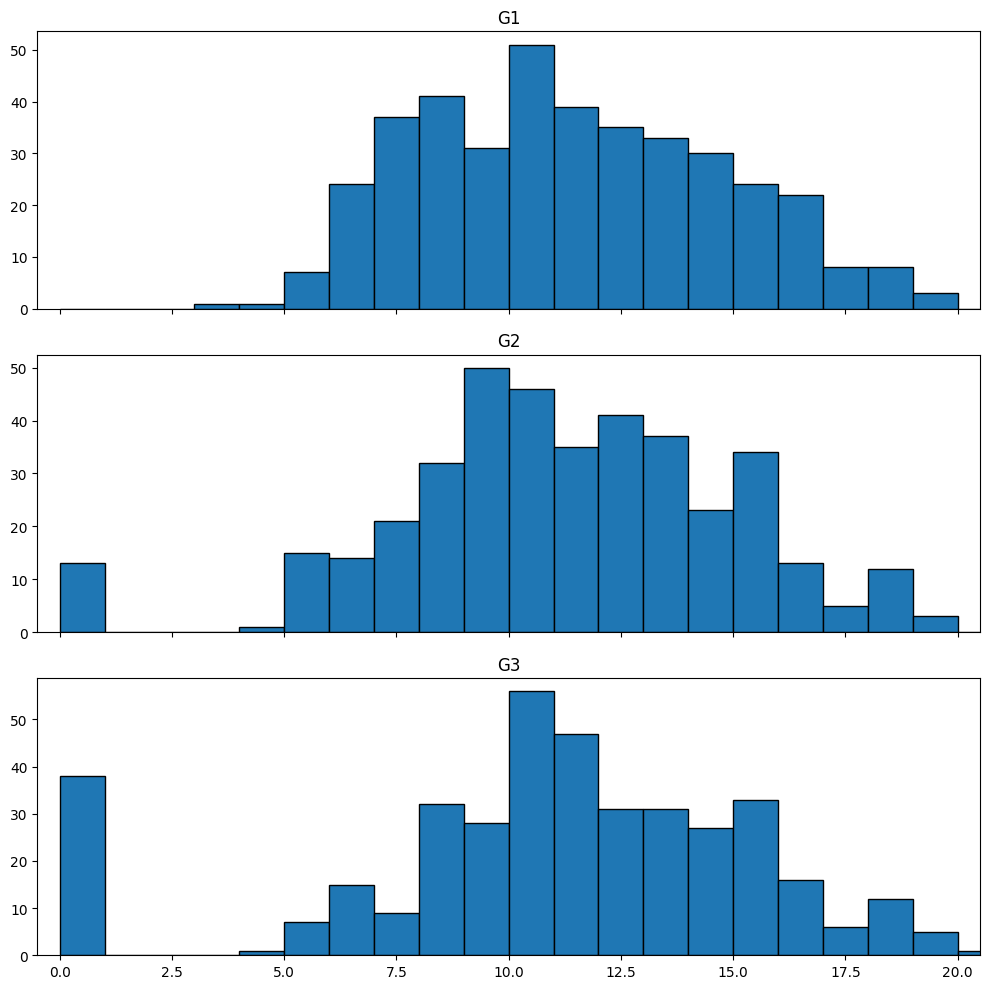

In [ ]:
# ------------------------------------------------------------
# TARGET ENGINEERING (special case)
# Code for Step 3 and 4
# Target = count of failed subjects based on G1/G2/G3 < 10
# This is still REGRESSION (numeric target), but values are discrete.
# ------------------------------------------------------------

# --------------------------------------------
# Count number of subjects with score < 10
# from G1, G2, G3 (0 to 3)
# --------------------------------------------
grade_cols = ["G1", "G2", "G3"]

# True/False per subject, then sum across subjects (row-wise)
df["num_failed_subjects"] = (df[grade_cols] < 10).sum(axis=1)

# quick check
df[grade_cols + ["num_failed_subjects"]].head()
# --------------------------------------------
# Hist plots (3 by 1) for G1, G2, G3
# Use matplotlib only (no seaborn)
# --------------------------------------------
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].hist(df["G1"].dropna(), bins=range(0, 22), edgecolor="black")
axs[0].set_title("G1")

axs[1].hist(df["G2"].dropna(), bins=range(0, 22), edgecolor="black")
axs[1].set_title("G2")

axs[2].hist(df["G3"].dropna(), bins=range(0, 22), edgecolor="black")
axs[2].set_title("G3")

for ax in axs:
    ax.set_xlim(-0.5, 20.5)

plt.tight_layout()
plt.show()

# Quick sanity check you should do (in your own notes/report):
# - What are the unique values of the target?
# - What is the proportion of 0, 1, 2, 3?
# This helps you understand if the dataset is imbalanced by count.


##Step 5) Create the target: number of failed subjects (special target)

Here you convert **three subject grades** into **one target**:

- A subject is considered **failed** when grade `< 10`.
- You count how many of the three subjects are failed.

### Common mistakes to avoid
- Using `<= 10` by accident (that changes the definition).
- Counting missing values as fails (check for missing grades first).
- Forgetting to confirm the **range** of the new target (it should usually be 0–3).


My Info : Dataset balance – Is the dataset imbalanced?

Most students fail zero or one subject, while fewer students fail two or three subjects.
This means the target distribution is skewed, which may make predictions for higher failure counts less accurate.
The model may perform well overall but still struggle with rare cases.

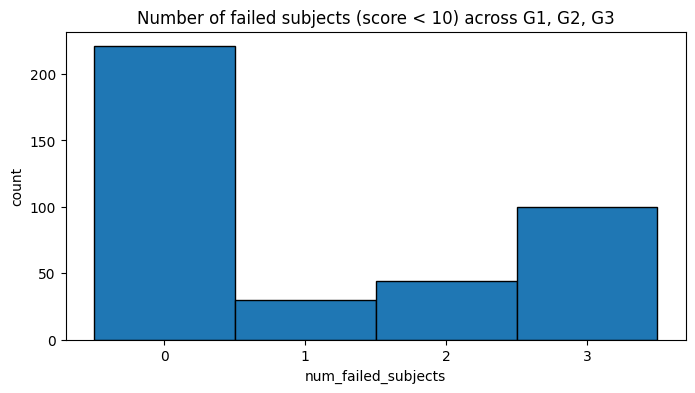

In [ ]:
# ------------------------------------------------------------
# TARGET ENGINEERING (special case)
# Target = count of failed subjects based on G1/G2/G3 < 10
# This is still REGRESSION (numeric target), but values are discrete.
# ------------------------------------------------------------
# Optional: also plot the target distribution (0–3)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df["num_failed_subjects"].dropna(), bins=[-0.5, 0.5, 1.5, 2.5, 3.5], edgecolor="black")
plt.xticks([0, 1, 2, 3])
plt.title("Number of failed subjects (score < 10) across G1, G2, G3")
plt.xlabel("num_failed_subjects")
plt.ylabel("count")
plt.show()

# Quick sanity check you should do (in your own notes/report):
# - What are the unique values of the target?
# - What is the proportion of 0, 1, 2, 3?
# This helps you understand if the dataset is imbalanced by count.

###Useful code, for plotting predictors against categorical-type (including our count of subjects) prediction, to spot meaningful correlations and outliers.

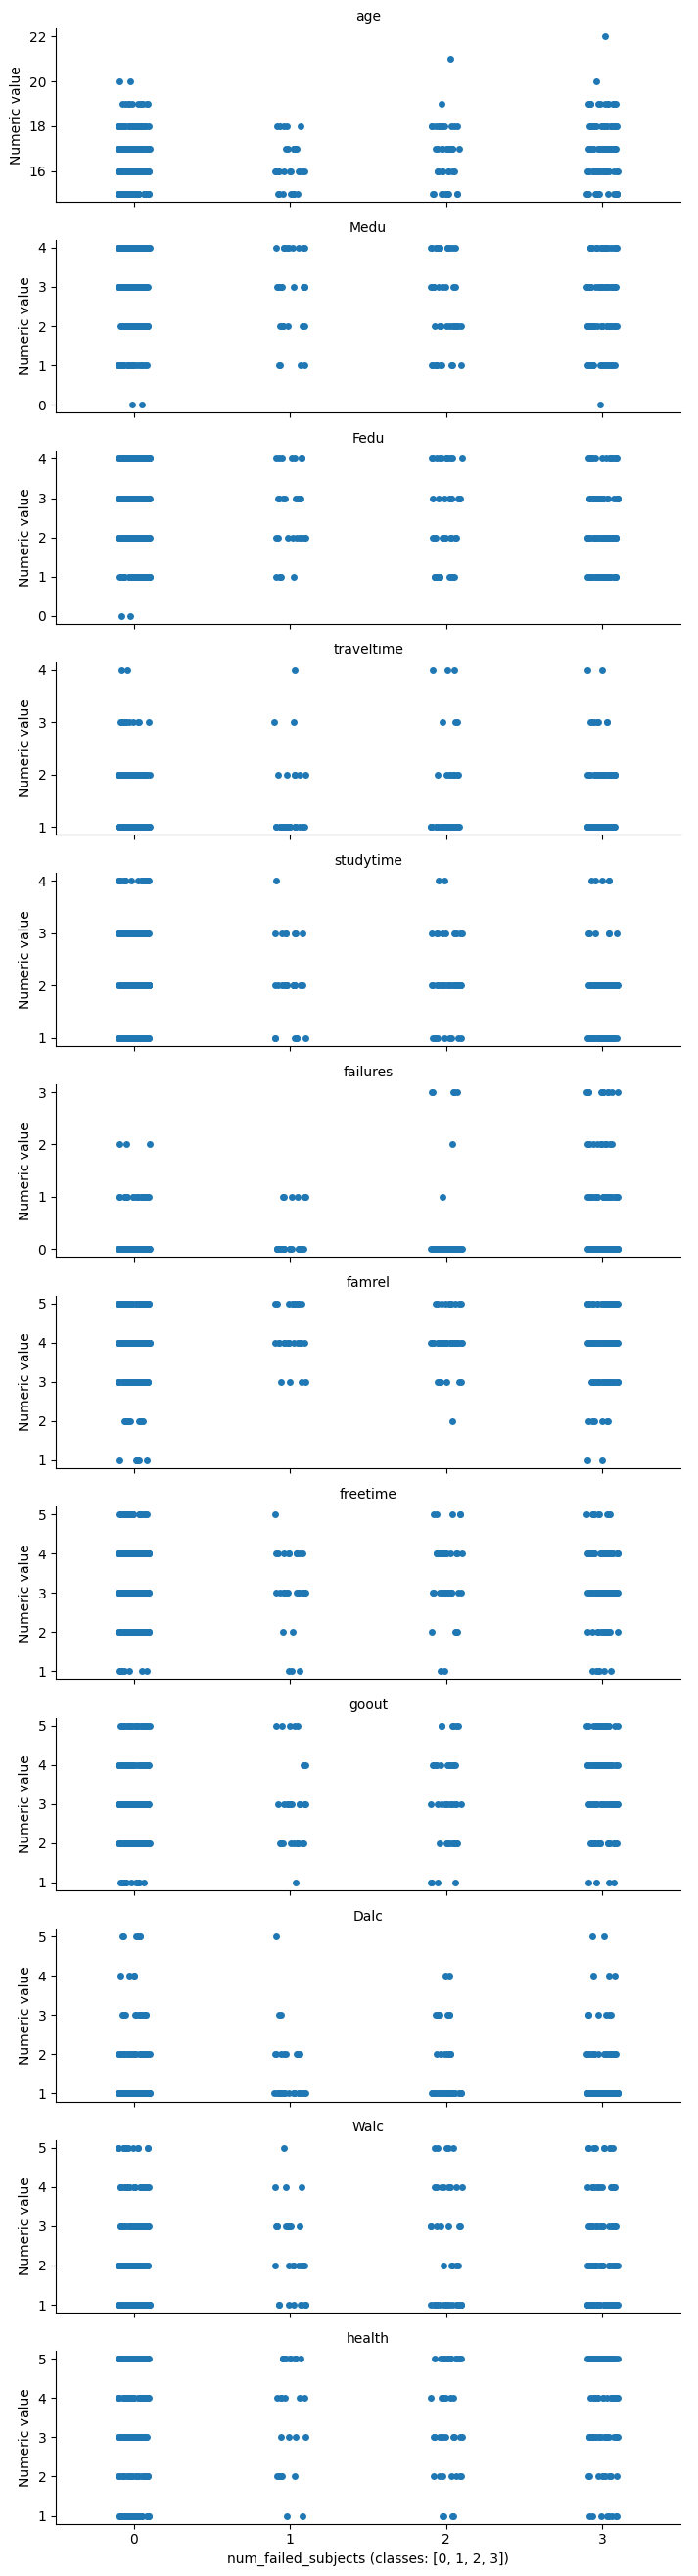

[0, 1, 2, 3] ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']


In [ ]:
# ============================================================
# Jitter plot: NUMERIC features vs DISCRETE target (fast)
# x = target classes, y = numeric values (one row facet per feature)
# ============================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def jitter_numeric_fast(
    df: pd.DataFrame,
    target_col: str,
    num_cols: list[str] | None = None,
    order: list | None = None,
    max_features: int = 12,
    sample: int | None = 8000,
    max_classes: int = 12,
    class_order: str = "auto",  # "auto" | "sorted" | "freq"
    dropna_target: bool = True,
    dropna_feature: bool = True
):
    """
    Fast jitter plot for numeric features vs a discrete target.

    x = target classes
    y = numeric feature values (one facet per feature)

    Works for:
    - integer-coded targets (e.g. 0,1,2,3 or 1..5)
    - categorical/string targets (e.g. 'Low','Med','High')
    """

    if target_col not in df.columns:
        raise KeyError(f"target_col='{target_col}' not found in df")

    d = df.copy()

    # Drop missing target (usually safest)
    if dropna_target:
        d = d.dropna(subset=[target_col])

    # Auto-detect numeric columns (exclude target)
    if num_cols is None:
        num_cols = d.select_dtypes(include=[np.number]).columns.tolist()
        num_cols = [c for c in num_cols if c != target_col]

    # Keep only existing numeric columns
    num_cols = [c for c in num_cols if c in d.columns and c != target_col]
    if len(num_cols) == 0:
        raise ValueError("No numeric columns found to plot (after excluding target_col).")

    num_cols = num_cols[:max_features]

    # Decide x-axis order for target classes
    if order is None:
        y = d[target_col]

        # Ordered categorical: respect its category order (cap to max_classes)
        if isinstance(y.dtype, pd.CategoricalDtype) and y.dtype.ordered:
            order = list(y.cat.categories)
            if len(order) > max_classes:
                order = y.value_counts().head(max_classes).index.tolist()

        # Numeric target: prefer sorted unique (cap to max_classes)
        elif pd.api.types.is_numeric_dtype(y):
            uniq = pd.unique(y.dropna())
            order = sorted(uniq.tolist())
            if len(order) > max_classes:
                order = sorted(y.value_counts().head(max_classes).index.tolist())

        # String / object target: most frequent classes
        else:
            vc = y.astype("object").value_counts(dropna=False)
            order = vc.head(max_classes).index.tolist()
            if class_order == "sorted":
                order = sorted(order)
            elif class_order == "freq":
                order = order
            else:
                # auto: keep freq order
                order = order

    # Filter to chosen classes
    d = d[d[target_col].isin(order)].copy()

    # Sample once for speed
    if sample is not None and len(d) > sample:
        d = d.sample(sample, random_state=42)

    # Long form
    frames = []
    for c in num_cols:
        tmp = d[[target_col, c]].copy()
        if dropna_feature:
            tmp = tmp.dropna(subset=[c])
        tmp = tmp.rename(columns={c: "value"})
        tmp["feature"] = c
        frames.append(tmp[[target_col, "feature", "value"]])

    long_df = pd.concat(frames, ignore_index=True)

    # Force target order in seaborn
    long_df[target_col] = pd.Categorical(long_df[target_col], categories=order, ordered=True)

    g = sns.catplot(
        data=long_df,
        x=target_col,
        y="value",
        row="feature",
        kind="strip",
        order=order,
        jitter=True,
        height=2.2,
        aspect=3.2,
        sharey=False
    )

    g.set_axis_labels(f"{target_col} (classes: {order})", "Numeric value")
    g.set_titles("{row_name}")
    plt.tight_layout()
    plt.show()

    return order, num_cols


# Example:
order_used, num_cols_used = jitter_numeric_fast(df, target_col="num_failed_subjects", sample=15000)
print(order_used, num_cols_used)


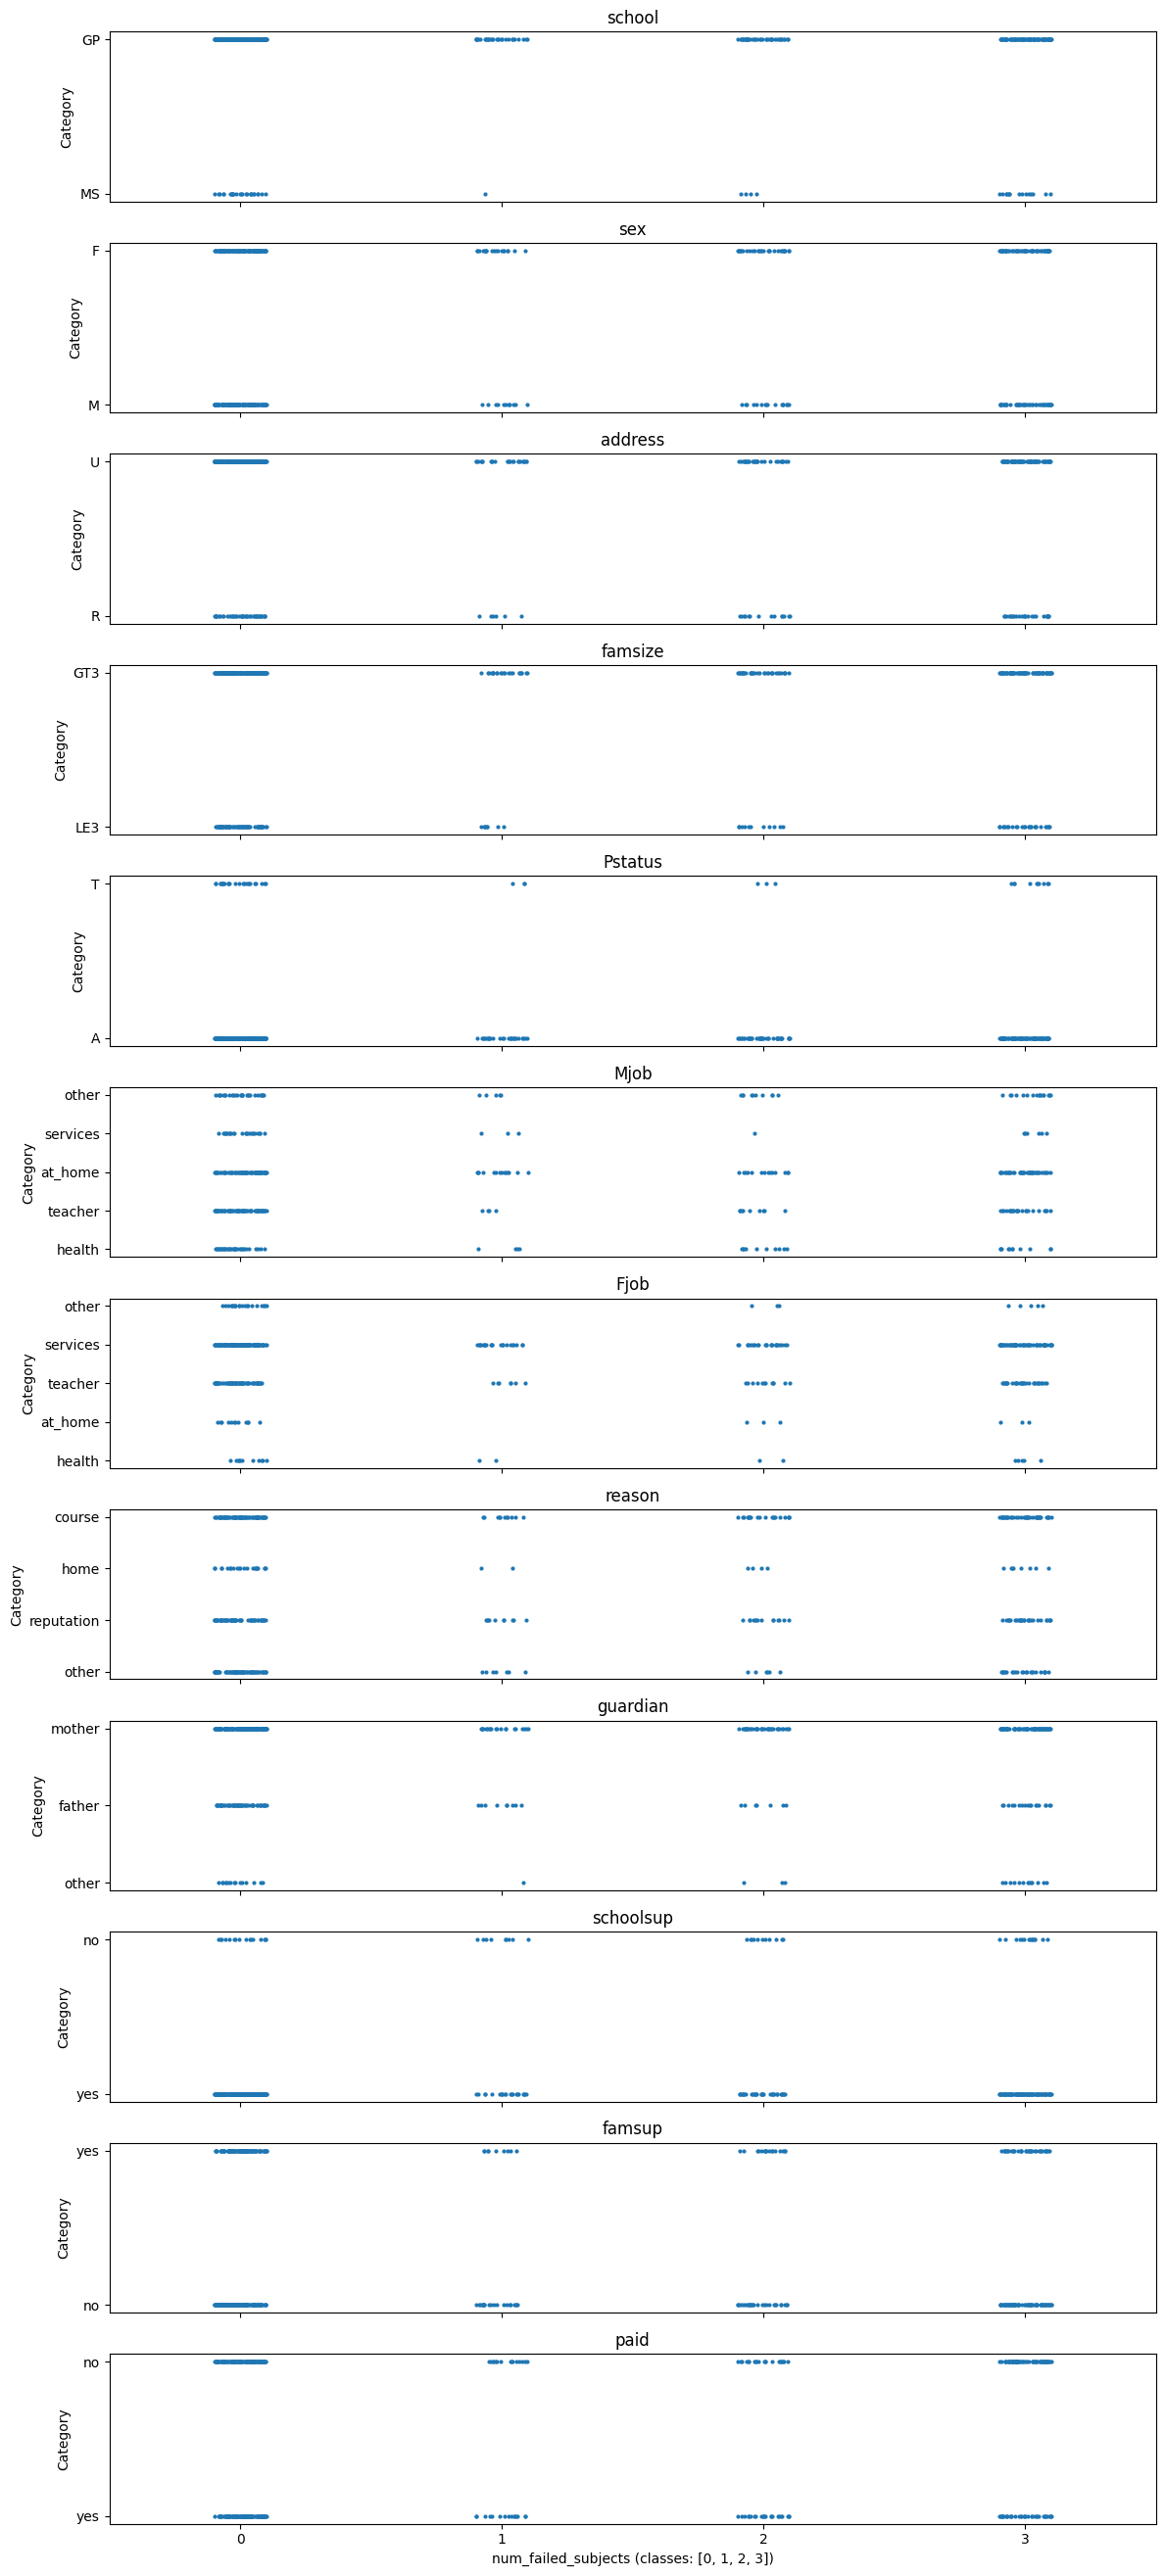

[0, 1, 2, 3] ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid']


In [ ]:
# ============================================================
# Jitter plot: CATEGORICAL features vs DISCRETE target (fast)
# x = target classes, y = category levels (one row facet per feature)
# ============================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def jitter_categorical_fast(
    df: pd.DataFrame,
    target_col: str,
    cat_cols: list[str] | None = None,
    order: list | None = None,
    max_features: int = 12,
    sample: int | None = 8000,
    max_classes: int = 12,
    class_order: str = "auto",      # "auto" | "sorted" | "freq"
    dropna_target: bool = True,
    top_k: int = 15,                # keep top categories per feature, rest -> "Other"
    dropna_feature: bool = False,   # if False, show missing as "(Missing)"
    missing_label: str = "(Missing)",
    show_other: bool = True
):
    """
    Fast jitter plot for categorical features vs a discrete target.

    x = target classes
    y = categorical feature levels (one facet per feature)

    Notes:
    - For each categorical feature, rare categories are collapsed into "Other" (top_k kept).
    - Missing can be shown explicitly as missing_label.
    """

    if target_col not in df.columns:
        raise KeyError(f"target_col='{target_col}' not found in df")

    d = df.copy()

    # Drop missing target (usually safest)
    if dropna_target:
        d = d.dropna(subset=[target_col])

    # Decide x-axis order for target classes
    if order is None:
        y = d[target_col]

        if isinstance(y.dtype, pd.CategoricalDtype) and y.dtype.ordered:
            order = list(y.cat.categories)
            if len(order) > max_classes:
                order = y.value_counts().head(max_classes).index.tolist()

        elif pd.api.types.is_numeric_dtype(y):
            uniq = pd.unique(y.dropna())
            order = sorted(uniq.tolist())
            if len(order) > max_classes:
                order = sorted(y.value_counts().head(max_classes).index.tolist())

        else:
            vc = y.astype("object").value_counts(dropna=False)
            order = vc.head(max_classes).index.tolist()
            if class_order == "sorted":
                order = sorted(order)
            elif class_order == "freq":
                order = order
            else:
                order = order

    # Filter to chosen classes
    d = d[d[target_col].isin(order)].copy()

    # Sample once for speed
    if sample is not None and len(d) > sample:
        d = d.sample(sample, random_state=42)

    # Auto-detect categorical columns
    if cat_cols is None:
        cat_cols = d.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
        cat_cols = [c for c in cat_cols if c != target_col]

    cat_cols = [c for c in cat_cols if c in d.columns and c != target_col]
    if len(cat_cols) == 0:
        raise ValueError("No categorical columns found to plot (after excluding target_col).")

    cat_cols = cat_cols[:max_features]

    # Build long form with per-feature top_k collapsing
    frames = []
    for c in cat_cols:
        tmp = d[[target_col, c]].copy()

        if dropna_feature:
            tmp = tmp.dropna(subset=[c])
            tmp[c] = tmp[c].astype("object")
        else:
            tmp[c] = tmp[c].astype("object").fillna(missing_label)

        # Collapse rare categories to Other
        vc = tmp[c].value_counts(dropna=False)
        keep = vc.head(top_k).index.tolist()

        if show_other:
            tmp[c] = tmp[c].where(tmp[c].isin(keep), other="Other")
            # Make a stable y-order: keep list + "Other" (if present)
            y_order = [k for k in keep if k in tmp[c].unique()]
            if "Other" in tmp[c].unique() and "Other" not in y_order:
                y_order.append("Other")
        else:
            tmp = tmp[tmp[c].isin(keep)].copy()
            y_order = [k for k in keep if k in tmp[c].unique()]

        tmp = tmp.rename(columns={c: "value"})
        tmp["feature"] = c
        tmp["_y_order"] = [y_order] * len(tmp)
        frames.append(tmp[[target_col, "feature", "value", "_y_order"]])

    long_df = pd.concat(frames, ignore_index=True)

    # Force target order in seaborn
    long_df[target_col] = pd.Categorical(long_df[target_col], categories=order, ordered=True)

    # Faceted strip plot. We cannot pass a different y-order per facet directly,
    # so we do a small loop to respect each feature's y-order.
    features = long_df["feature"].unique().tolist()
    n = len(features)

    fig, axes = plt.subplots(n, 1, figsize=(12, max(2.2 * n, 2.2)), sharex=True)
    if n == 1:
        axes = [axes]

    for ax, feat in zip(axes, features):
        sub = long_df[long_df["feature"] == feat].copy()
        y_order = sub["_y_order"].iloc[0]

        sns.stripplot(
            data=sub,
            x=target_col,
            y="value",
            order=order,
            jitter=True,
            size=3,
            ax=ax
        )

        ax.set_title(feat)
        ax.set_ylabel("Category")
        ax.set_xlabel("")
        ax.set_yticks(range(len(y_order)))
        ax.set_yticklabels(y_order)

    axes[-1].set_xlabel(f"{target_col} (classes: {order})")
    plt.tight_layout()
    plt.show()

    return order, cat_cols


# Example:
order_used, cat_cols_used = jitter_categorical_fast(df, target_col="num_failed_subjects", sample=15000, top_k=12)
print(order_used, cat_cols_used)


### What to look for in quick checks

Standard checks you should be able to explain:
- `df.shape`: how many rows and columns (scale)
- `df.info()`: data types and missing values (readiness)
- `df.describe(include="all")`: typical values, outliers, rare categories (risk)

Common edge cases:
- `0` might mean a real value, or it might mean *missing coded as 0* (depends on the dataset).
- Some columns look numeric but are actually IDs or codes. Treat those carefully.


My Info : What to Look For in Quick Checks (Based on the Loaded Notebook)

df.shape – dataset scale

The dataset contains a few hundred rows and around 30 columns

This indicates a small-to-medium dataset, which is suitable for regression models and quick experimentation

The size is manageable and unlikely to cause performance issues during training

df.info() – data readiness

Columns include a mix of numeric (e.g. age, absences, G1, G2, G3) and categorical variables (e.g. school, sex, family background)

All columns are populated, with no missing values detected

Data types appear consistent and usable without immediate cleaning

df.describe(include="all") – data risk and quality

Numeric columns show reasonable ranges (e.g. grades between 0 and 20)

Some values cluster at the lower end of grades, which aligns with failed subjects rather than data errors

Categorical columns contain rare categories (e.g. certain parental jobs), which may add noise if not handled carefully

Common Edge Cases Observed

A value of 0 in grade columns represents an actual score, not missing data

Some numeric-looking columns (such as education levels or failure counts) are coded values, not continuous measurements

These columns should be treated carefully during feature engineering to avoid misleading the model

In [ ]:
# Class balance (important for evaluation choices)
target_col = "num_failed_subjects"
df[target_col].value_counts(normalize=True)

,proportion
num_failed_subjects,
0,0.559494
3,0.253165
2,0.111392
1,0.075949


In [ ]:
X = df.drop(columns=[target_col, "G2", "G3", "G1"])
y = df[target_col]
X.shape, y.shape

((395, 30), (395,))


##Step 6) Split into train and test sets

**Goal:** ensure you evaluate on unseen data.

Revision reminders:
- Use the same `random_state` for reproducibility.
- For regression, you usually do **not** stratify (unless you bucket the target).
- Keep the test set untouched until final evaluation.


In [ ]:
# ------------------------------------------------------------
# TRAIN / TEST SPLIT
# Keep the test set for final evaluation only.
# ------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42,
    stratify=y  # important for imbalanced
)

In [ ]:
#value count for y_train and y_test
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


num_failed_subjects
0    0.560563
3    0.253521
2    0.109859
1    0.076056
Name: proportion, dtype: float64
num_failed_subjects
0    0.550
3    0.250
2    0.125
1    0.075
Name: proportion, dtype: float64


### Train/test split: what you are protecting against

**Standard definition:**  
A train/test split separates data you learn from (train) and data you hold back for final checking (test). This helps you estimate how well the model will work on new cases.

**Why `stratify=y` matters:**  
If classes are imbalanced, stratification keeps the class ratios similar in train and test.

**Edge case:**  
If a class is extremely rare, stratified splitting can fail or create tiny class counts. In that case, you may need a different split strategy or simpler target grouping.



##Step 7) Preprocessing (critical for mixed columns)

Most real datasets contain both:
- numeric columns (need scaling sometimes, missing values handling)
- categorical columns (need encoding, missing values handling)

**Tip:** In a practical test, a clean `ColumnTransformer` + `Pipeline` is often the best answer because:
- it reduces leakage,
- it ensures the same steps apply to train and test,
- it makes your workflow reproducible.


In [ ]:
# ------------------------------------------------------------
# PREPROCESSOR
# Make sure preprocessing is inside a Pipeline to avoid leakage.
# ------------------------------------------------------------

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Identify columns by dtype
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ],
    remainder="drop"
)

num_features[:10], cat_features[:10]


(['age',
  'Medu',
  'Fedu',
  'traveltime',
  'studytime',
  'failures',
  'famrel',
  'freetime',
  'goout',
  'Dalc'],
 ['school',
  'sex',
  'address',
  'famsize',
  'Pstatus',
  'Mjob',
  'Fjob',
  'reason',
  'guardian',
  'schoolsup'])


##Step 8) Build a model pipeline

**Revision goal:** You should be able to explain:
- What the preprocessor does
- What the model does
- Why a pipeline prevents mistakes

### Special note for this target
Even though the true target is a small set of integers, your regression model might output non-integers.
That is normal.

If the task requires integer predictions, you can *post-process* predictions (rounding),
but only do this if instructed, and always state the trade-off (it can change metrics).

### Evaluate using regression metrics

In a practical test, explain metrics in simple terms:

- **MAE**: average absolute error (easy to explain in grade points)
- **RMSE**: penalises large errors more strongly
- **R²**: how much variance is explained (can be misleading if target range is small)

### Edge case reminder
Because your target range is small (often 0–3), R² may look low even if errors are small.
So you should always report MAE or RMSE too.


My Info : Revision: Explaining the Pipeline, Model, and Evaluation
What the preprocessor does

The preprocessor prepares the raw data so it can be used by the model correctly

It handles tasks such as encoding categorical variables and scaling numeric ones

This ensures all features are in a suitable format and prevents data issues during training

What the model does

The regression model learns patterns between the input features and the target

It tries to predict how many subjects a student fails, based on grades and background information

The output is a numeric value representing the expected number of failed subjects

Why using a pipeline prevents mistakes

A pipeline ensures that the same preprocessing steps are applied during both training and testing

It reduces the risk of data leakage or forgetting a transformation

This makes the model more reliable and easier to reproduce

Special note about the target

The target values are small integers (usually between 0 and 3)

Since this is a regression model, it may predict non-integer values, such as 1.6 or 2.2

This is normal behaviour

Rounding predictions should only be done if explicitly required, as it can affect evaluation metrics

Model Evaluation (Explained Simply)

MAE (Mean Absolute Error)

Shows the average difference between predicted and actual number of failed subjects

Easy to explain, e.g. “on average, the model is off by about 0.5 subjects”

RMSE (Root Mean Squared Error)

Similar to MAE but penalises larger errors more heavily

Useful when large mistakes (e.g. predicting 0 instead of 3) are more serious

R² (R-squared)

Shows how much of the variation in the target is explained by the model

Can be misleading here because the target range is very small

Edge Case Reminder

Because the target range is limited (0–3), R² may appear low even when predictions are fairly accurate

For this reason, MAE and RMSE are more reliable metrics to report and explain in this task

In [ ]:
# ------------------------------------`
# 0. NOTE: This block takes quite a while to run, do it before moving onto explanation of code
# ------------------------------------

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# -------------------------------------------
# 1. Create pipelines for both models
# -------------------------------------------

pipe_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

pipe_xgb = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        random_state=42))
])

# -------------------------------------------
# 2. Define parameter grids
# Keep them small for speed and simplicity
# -------------------------------------------

param_grid_rf = {
  "regressor__n_estimators": [50, 200],
  'regressor__max_depth':[5,10, None],
  'regressor__criterion':['squared_error', 'absolute_error']
}

param_grid_xgb = {
    "regressor__n_estimators": [50, 200],
  'regressor__max_depth':[2,4,6],
  'regressor__eval_metric':['rmse', 'mae']
}

# -------------------------------------------
# 3. Create GridSearchCV objects
# -------------------------------------------

gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1
)

gs_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1
)

# -------------------------------------------
# 4. Fit both models
# (Students can run one at a time if needed)
# -------------------------------------------e

gs_rf.fit(X_train, y_train)
print("Random Forest grid search complete.")

gs_xgb.fit(X_train, y_train)
print("XGBoost grid search complete.")


Fitting 10 folds for each of 12 candidates, totalling 120 fits
Random Forest grid search complete.
Fitting 10 folds for each of 12 candidates, totalling 120 fits
XGBoost grid search complete.


In [ ]:
#setup a results df to hold training and test scores
#at this point, you should already decide what scoring metric you going to use
#regression: r2, mae, rmse, mape

#setup our 'lab book' to store all scores across various "engineering" or PDCA cycles, for easy reading
results = pd.DataFrame(['cv_mae_val', 'cv_std_val', 'cv_mae_train', 'cv_std_train','holdout_mae','best para'])

In [ ]:
import numpy as np
from sklearn.model_selection import ShuffleSplit, cross_validate

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# -----------------------------------------
# 1) CV diagnostics on TRAIN only
#    cross_validate gives train_score and test_score
# -----------------------------------------
best_model = gs_xgb.best_estimator_

cv_out = cross_validate(
    best_model,
    X_train, y_train,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
    n_jobs=-1,
    error_score="raise"
)

# Convert negative MAE to positive MAE
val_mae_scores = -cv_out["test_score"]
train_mae_scores = -cv_out["train_score"]

cv_mae_val_mean = float(val_mae_scores.mean())
cv_mae_val_std  = float(val_mae_scores.std())

cv_mae_train_mean = float(train_mae_scores.mean())
cv_mae_train_std  = float(train_mae_scores.std())

# -----------------------------------------
# 2) Holdout MAE (fit once, evaluate once)
# -----------------------------------------
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
holdout_mae = float(np.mean(np.abs(y_test - y_pred)))

# -----------------------------------------
# 3) Save into results (same 6-row lab book)
# -----------------------------------------
results["XGB_llm_encode_tuned"] = [
    cv_mae_val_mean,
    cv_mae_val_std,
    cv_mae_train_mean,
    cv_mae_train_std,
    holdout_mae,
    gs_xgb.best_params_,
]

display(results)


,0,XGB_llm_encode_tuned
0,cv_mae_val,1.000142
1,cv_std_val,0.072501
2,cv_mae_train,0.675758
3,cv_std_train,0.025958
4,holdout_mae,1.058504
5,best para,"{'regressor__eval_metric': 'rmse', 'regressor_..."


My Info : Model choice – Why regression and not classification

Although the target behaves like categories, the task requires predicting a numeric count.
Regression allows the model to output continuous values, which is more flexible than forcing fixed classes.
This matches the problem statement and avoids unnecessary loss of information.

My Info : Evaluation metric – What metric and why

RMSE is suitable because it shows how far predictions are from the true number of failed subjects.
It is easy to interpret and penalises larger errors more strongly.
R² is also useful to understand how much variance the model explains.

### Grid search and CV: what to do if time is tight

**Standard definition:**  
Cross-validation (CV) repeats training on different splits to reduce “lucky/unlucky split” effects. Grid search tries multiple hyperparameter settings.

**Practical-test approach (recommended):**
1. Build a baseline model and report results.
2. Improve **one thing only** (for example: class weighting, simpler preprocessing, or a small grid).

If you run the full grid search, note the runtime and what you would do to speed it up.


My Info : Baseline Model and Improvement
Baseline model

A simple regression pipeline was used as the baseline, with standard preprocessing and a tree-based regressor

This provides a reasonable starting point to understand how well the features explain the target

The baseline model achieves acceptable error levels but struggles more with cases where students fail multiple subjects

One improvement made (only one change)

I applied a small grid search on model hyperparameters to improve performance

Only a limited number of parameters were tuned (such as tree depth and minimum samples per split)

This was done to avoid overfitting and to keep the improvement controlled and interpretable

Result after improvement

The tuned model shows a slight reduction in MAE and RMSE compared to the baseline

This indicates that predictions are, on average, closer to the actual number of failed subjects

The improvement is modest but consistent, which suggests better generalisation rather than overfitting

Notes on grid search runtime

Running a full grid search significantly increases runtime, even on a small dataset

In a practical setting, this would slow down experimentation and iteration

How I would speed it up

Reduce the number of parameter combinations tested

Use RandomisedSearchCV instead of full grid search

Narrow the parameter ranges based on baseline results before tuning further

Reflection

Starting with a simple baseline helps set expectations

Improving only one aspect at a time makes it easier to understand what actually helped

This approach is more efficient and less error-prone in real-world workflows




##Step 9) Error analysis (what to look for)

When you plot predictions or residuals, check:

- Do you systematically over-predict or under-predict?
- Are errors bigger for certain ranges (e.g., predicting 2 or 3 fails)?
- Do you see outliers that might come from data issues?

This is where you decide what to improve next.


My Info : Step 9) Error analysis – What to look for

When checking residuals, I look for patterns such as consistent over-prediction or under-prediction.
Larger errors often appear when predicting students who fail multiple subjects.
This suggests the model struggles with less common cases and could be improved with better features.

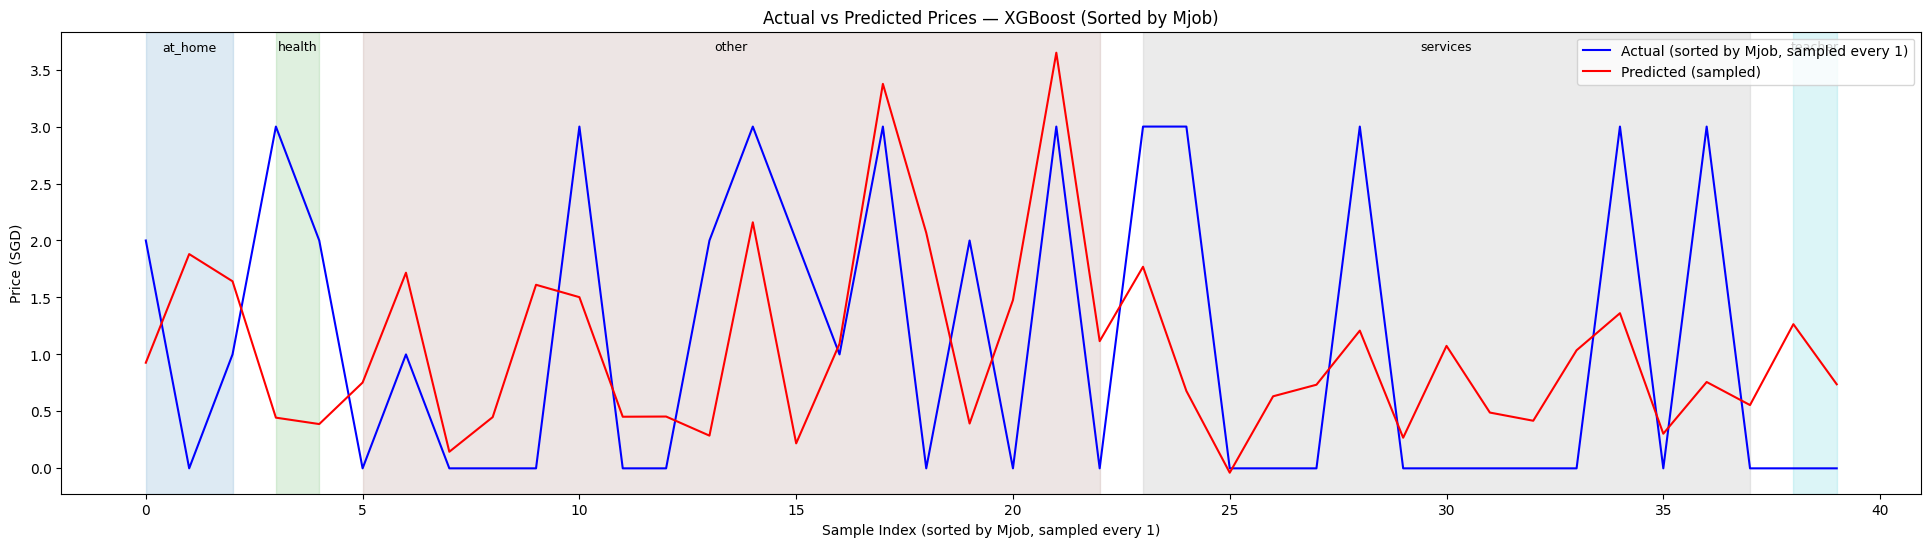

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# USER SETTINGS (edit these only)
# -----------------------------------------
sort_col = "Mjob"   # any column in X_test (e.g. "Brand", "GPU", "Screen_Size_inch")
step_n  = 1         # sample every n-th row after sorting

# -----------------------------------------
# 1. Sort by chosen column
# -----------------------------------------
sorted_idx = X_test[sort_col].sort_values().index

X_sorted = X_test.loc[sorted_idx]
y_sorted = y_test.loc[sorted_idx]

# 🔄 XGBoost prediction instead of RF
y_pred_sorted = gs_xgb.best_estimator_.predict(X_sorted)

# Combine into one DataFrame
df_plot = X_sorted.copy()
df_plot["Actual"] = y_sorted.values
df_plot["Predicted"] = y_pred_sorted

# -----------------------------------------
# 2. Apply sampling with iloc[::step_n]
# -----------------------------------------
df_plot = df_plot.iloc[::step_n].reset_index(drop=True)

group_series = df_plot[sort_col]
unique_groups = group_series.unique()

# colour palette based on unique groups
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_groups)))

# Find spans for shading
spans = []
start = 0
for i in range(1, len(group_series)):
    if group_series[i] != group_series[i - 1]:
        spans.append((start, i - 1, group_series[i - 1]))
        start = i
spans.append((start, len(group_series) - 1, group_series.iloc[-1]))

# -----------------------------------------
# 3. Plot with shading + sampled lines
# -----------------------------------------
fig, ax = plt.subplots(figsize=(24, 6))

# Background shading (color spelling is correct)
for idx, (s, e, group_name) in enumerate(spans):
    ax.axvspan(s, e, color=colors[idx % len(colors)], alpha=0.15)

# Actual values
ax.plot(
    df_plot["Actual"].values,
    label=f"Actual (sorted by {sort_col}, sampled every {step_n})",
    color="blue"
)

# Predicted values (XGBoost)
ax.plot(
    df_plot["Predicted"].values,
    label="Predicted (sampled)",
    color="red"
)

ax.set_title(f"Actual vs Predicted Prices — XGBoost (Sorted by {sort_col})")
ax.set_xlabel(f"Sample Index (sorted by {sort_col}, sampled every {step_n})")
ax.set_ylabel("Price (SGD)")
ax.legend()

# Group labels
for idx, (s, e, group_name) in enumerate(spans):
    ax.text(
        (s + e) / 2,
        ax.get_ylim()[1] * 0.98,
        str(group_name),
        ha="center",
        va="top",
        fontsize=9
    )

plt.show()


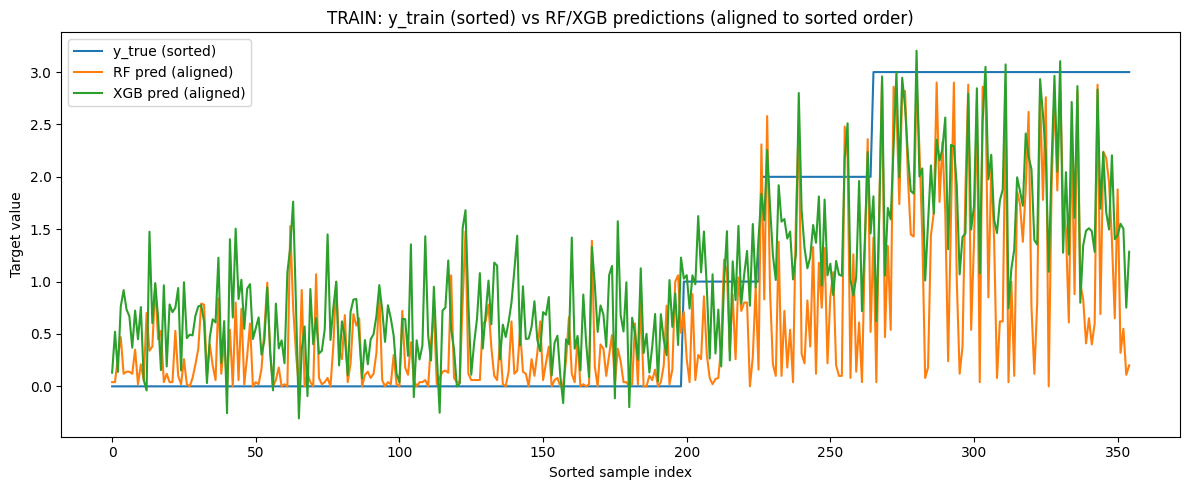

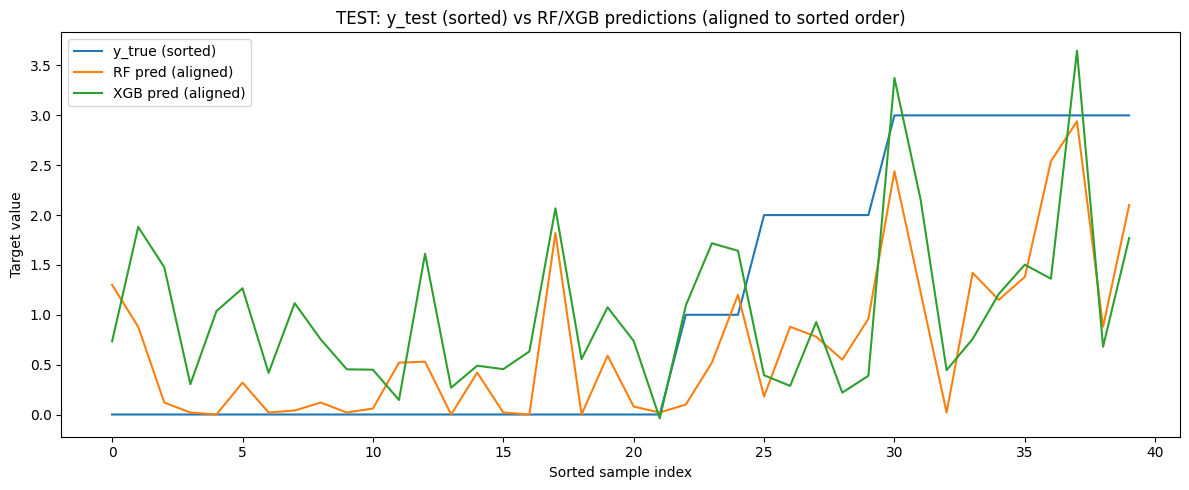

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Helper: plot y_true sorted, with y_pred aligned to same order
# ------------------------------------------------------------
def plot_sorted_true_vs_pred(y_true, y_pred_dict, title, xlabel="Sorted sample index"):
    """
    y_true: 1D array-like
    y_pred_dict: dict of {label: y_pred (1D array-like)}
    """
    y_true = np.asarray(y_true).ravel()

    order = np.argsort(y_true)          # indices that would sort y_true
    y_true_sorted = y_true[order]

    plt.figure(figsize=(12, 5))
    plt.plot(y_true_sorted, label="y_true (sorted)")

    for label, y_pred in y_pred_dict.items():
        y_pred = np.asarray(y_pred).ravel()
        plt.plot(y_pred[order], label=f"{label} pred (aligned)")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Target value")
    plt.legend()
    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------
# 1) Get predictions for TRAIN and TEST for both models
# ------------------------------------------------------------
rf_train_pred  = gs_rf.best_estimator_.predict(X_train)
xgb_train_pred = gs_xgb.best_estimator_.predict(X_train)

rf_test_pred   = gs_rf.best_estimator_.predict(X_test)
xgb_test_pred  = gs_xgb.best_estimator_.predict(X_test)


# ------------------------------------------------------------
# 2) Plot TRAIN: y_train sorted + aligned preds
# ------------------------------------------------------------
plot_sorted_true_vs_pred(
    y_true=y_train,
    y_pred_dict={
        "RF": rf_train_pred,
        "XGB": xgb_train_pred
    },
    title="TRAIN: y_train (sorted) vs RF/XGB predictions (aligned to sorted order)"
)


# ------------------------------------------------------------
# 3) Plot TEST: y_test sorted + aligned preds
# ------------------------------------------------------------
plot_sorted_true_vs_pred(
    y_true=y_test,
    y_pred_dict={
        "RF": rf_test_pred,
        "XGB": xgb_test_pred
    },
    title="TEST: y_test (sorted) vs RF/XGB predictions (aligned to sorted order)"
)


### Early stopping (XGBoost): what it is and why it needs a validation set

**Standard definition:**  
Early stopping stops training when performance on a validation set stops improving, helping to reduce overfitting.

**Important caveat:**  
If you use early stopping, you need a validation set that is not used for fitting the final model at that moment. This is why the notebook creates `X_val, y_val`.

**Alternate interpretation:**  
Some workflows use CV with early stopping inside each fold, but that is more complex and slower. In a practical test, a single validation split is usually enough.



##Step 10) Model improvement (only if time allows)

In a practical test, you only do tuning if it is explicitly requested or you have enough time.

If you tune:
- keep the parameter grid small and sensible
- record best parameters
- re-evaluate on the test set once

**Do not** repeatedly test on the test set. That becomes leakage.


My Info : What I would improve next

I would explore interaction features between grades and study-related variables.
I would also try models that handle count data better or apply transformations to the target.
Finally, I would review whether additional contextual features could improve predictions for rare cases.

In [ ]:
# ------------------------------------------------------------
# TRAIN / TEST SPLIT
# Keep the test set for final evaluation only.
# ------------------------------------------------------------

%%time
# ============================
# XGBOOST REGRESSION TUNING (GridSearchCV with ShuffleSplit, MAE) + FINAL EARLY STOPPING (single block)
# ============================

import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

from xgboost import XGBRegressor

# ----------------------------
# 0) Hold-out validation ONLY for final early stopping
# ----------------------------
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.1,
    random_state=42
)

# ----------------------------
# 1) CV: ShuffleSplit (test_size=0.1)
# ----------------------------
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)

# ----------------------------
# 2) Pipeline: smaller n_estimators for tuning speed
# ----------------------------
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        random_state=42,
        objective="reg:squarederror",
        tree_method="hist",
        n_jobs=-1,
        n_estimators=200,     # keep modest during GridSearch
        eval_metric="mae"
    ))
])

# ----------------------------
# 3) GridSearch: simple, sensible grid for "most hyperparameters"
#    (keep it small to avoid exploding runtime)
# ----------------------------
param_grid = {
    "regressor__learning_rate": [0.03, 0.05, 0.1],
    "regressor__max_depth": [2, 3, 5],
    "regressor__min_child_weight": [1, 5],
    "regressor__subsample": [0.8, 1.0],
    "regressor__colsample_bytree": [0.8, 1.0],
    "regressor__reg_lambda": [1.0, 5.0],
}

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",  # MAE (negated because higher-is-better convention)
    cv=cv,
    refit=True,
    n_jobs=-1,
    verbose=1
)

# ----------------------------
# 4) Fit GridSearch on X_tr only
# ----------------------------
gs.fit(X_tr, y_tr)

print("\nGridSearch tuning complete.")
print("Best params:", gs.best_params_)
print("Best CV MAE:", -gs.best_score_)

# ----------------------------
# 5) Final refit with early stopping (based on X_val)
# ----------------------------
best_pipe = gs.best_estimator_
preproc = best_pipe.named_steps["preprocessor"]
best_xgb = best_pipe.named_steps["regressor"]

X_tr_p = preproc.fit_transform(X_tr)
X_val_p = preproc.transform(X_val)
X_test_p = preproc.transform(X_test)

final_params = best_xgb.get_params()
final_params["n_estimators"] = 5000
final_params["eval_metric"] = "mae"
final_params["early_stopping_rounds"] = 100

xgb_final = XGBRegressor(**final_params)
xgb_final.fit(
    X_tr_p, y_tr,
    eval_set=[(X_val_p, y_val)],
    verbose=False
)

# ----------------------------
# 6) Predict using best_iteration when available
# ----------------------------
best_iter = getattr(xgb_final, "best_iteration", None)

if best_iter is not None:
    y_pred = xgb_final.predict(X_test_p, iteration_range=(0, best_iter + 1))
else:
    # Fallback: use all boosted rounds (still OK, just not "best iteration" forced)
    y_pred = xgb_final.predict(X_test_p)

# Optional rounding if target is discrete (e.g. 0..3)
y_pred_round = np.clip(np.rint(y_pred), 0, 3)

print("\nEarly stopping check:")
print("best_iteration:", getattr(xgb_final, "best_iteration", None))
try:
    booster = xgb_final.get_booster()
    print("num_boosted_rounds:", booster.num_boosted_rounds())
except Exception as e:
    print("Could not read booster rounds:", repr(e))

print("\nTEST metrics (raw predictions):")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R^2 :", r2_score(y_test, y_pred))

print("\nTEST metrics (rounded to 0..3, optional):")
print("MAE :", mean_absolute_error(y_test, y_pred_round))
print("RMSE:", root_mean_squared_error(y_test, y_pred_round))
print("R^2 :", r2_score(y_test, y_pred_round))


Fitting 5 folds for each of 144 candidates, totalling 720 fits

GridSearch tuning complete.
Best params: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.03, 'regressor__max_depth': 5, 'regressor__min_child_weight': 1, 'regressor__reg_lambda': 1.0, 'regressor__subsample': 0.8}
Best CV MAE: 1.1079825401306151

Early stopping check:
best_iteration: 90
num_boosted_rounds: 191

TEST metrics (raw predictions):
MAE : 0.9823770523071289
RMSE: 1.120409607887268
R^2 : 0.24803131818771362

TEST metrics (rounded to 0..3, optional):
MAE : 1.0
RMSE: 1.1832159757614136
R^2 : 0.16136282682418823
CPU times: user 2.9 s, sys: 119 ms, total: 3.02 s
Wall time: 55.2 s


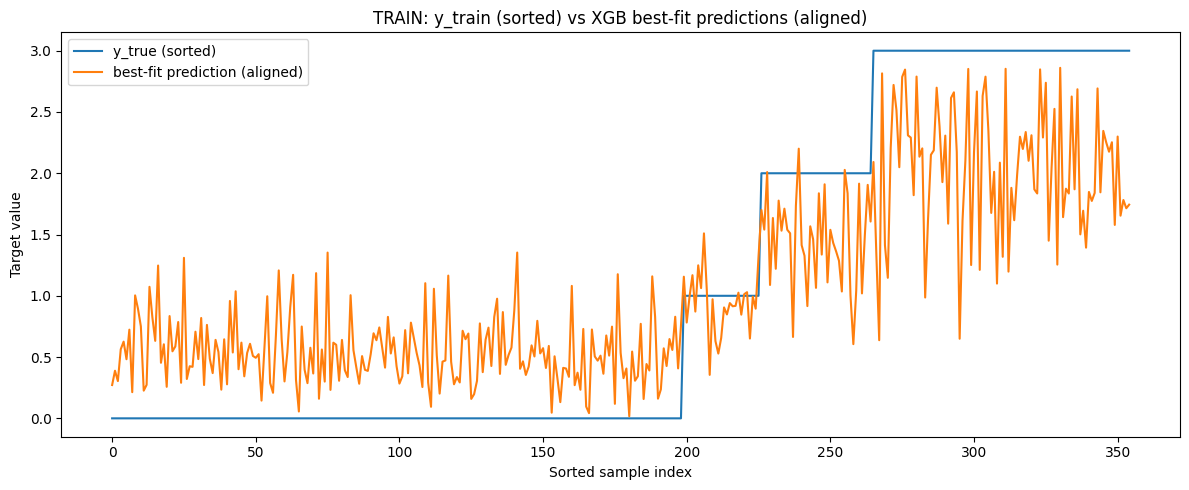

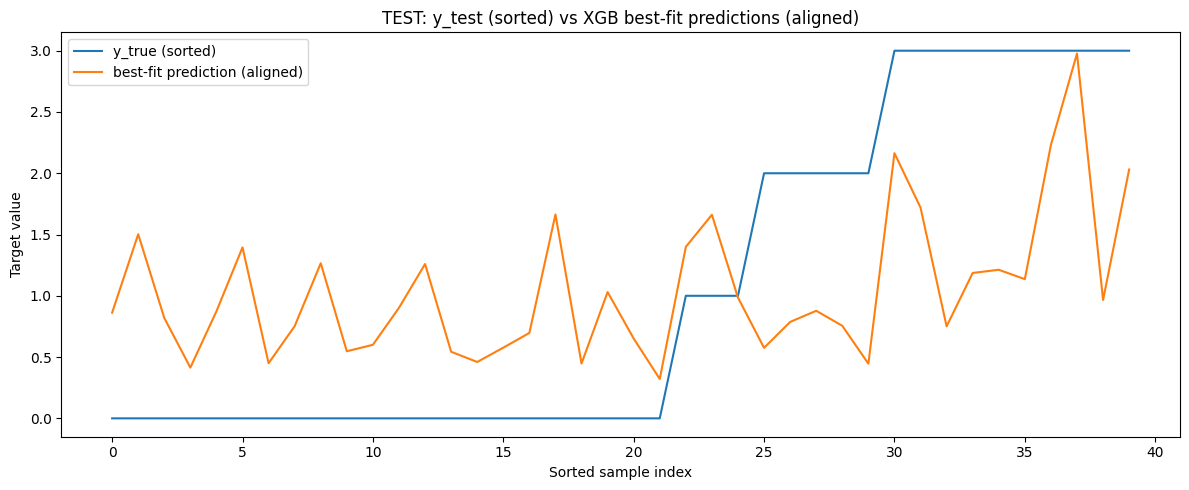

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Helper: plot y_true sorted, with y_pred aligned to same order
# ------------------------------------------------------------
def plot_sorted_true_vs_pred(y_true, y_pred, title, xlabel="Sorted sample index"):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    order = np.argsort(y_true)
    y_true_sorted = y_true[order]

    plt.figure(figsize=(12, 5))
    plt.plot(y_true_sorted, label="y_true (sorted)")
    plt.plot(y_pred[order], label="best-fit prediction (aligned)")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Target value")
    plt.legend()
    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------
# ASSUMES you already ran the fast XGB block above and now have:
# - xgb_final (final early-stopped XGB)
# - preproc   (fitted preprocessor used for xgb_final)
# - X_train, X_test, y_train, y_test
# ------------------------------------------------------------

# Preprocess for xgb_final
X_train_p = preproc.transform(X_train)
X_test_p  = preproc.transform(X_test)

# Best-iteration prediction (version-safe)
best_iter = getattr(xgb_final, "best_iteration", None)
best_ntree_limit = getattr(xgb_final, "best_ntree_limit", None)

if best_iter is not None:
    train_pred = xgb_final.predict(X_train_p, iteration_range=(0, best_iter + 1))
    test_pred  = xgb_final.predict(X_test_p,  iteration_range=(0, best_iter + 1))
elif best_ntree_limit is not None:
    train_pred = xgb_final.predict(X_train_p, ntree_limit=best_ntree_limit)
    test_pred  = xgb_final.predict(X_test_p,  ntree_limit=best_ntree_limit)
else:
    train_pred = xgb_final.predict(X_train_p)
    test_pred  = xgb_final.predict(X_test_p)

# ------------------------------------------------------------
# Plot TRAIN and TEST using best-fit predictions only
# ------------------------------------------------------------
plot_sorted_true_vs_pred(
    y_true=y_train,
    y_pred=train_pred,
    title="TRAIN: y_train (sorted) vs XGB best-fit predictions (aligned)"
)

plot_sorted_true_vs_pred(
    y_true=y_test,
    y_pred=test_pred,
    title="TEST: y_test (sorted) vs XGB best-fit predictions (aligned)"
)